# OVERFLOW

This notebook shows how you can do some analysis of the OVERFLOW experiment. 
This is an example of plot of temperature after 3 and 9 hours of run, using a forth/order advection scheme, with partial cells.

# Run python script to have figure

To have figure you need 3 outputs:
- output filename
- mesh_mask file (output via namelist parameter nn_msh=1 in "namdom" block)
- time step value

## Do figure with python script: 

In [3]:
%pylab inline
from netCDF4 import Dataset
import numpy as np
import sys 
import matplotlib.pyplot as plt 
import pylab
import scipy

Populating the interactive namespace from numpy and matplotlib


In [4]:
# set time step after 3 hours, to see how water masses are moving
time='6'
# read netcdf file
ncfile = Dataset('OVF_zps_FCT4_fluxcen2_lapahm100_avm0001_grid_T.nc', mode='r')

In [5]:
# read mesh_mask
ncmesh = Dataset('mesh_mask_OVF_zps.nc')
lat2d  = ncmesh.variables['gphit'][  :,:].squeeze()
lon2d  = ncmesh.variables['glamt'][  :,:].squeeze()
msk    = ncmesh.variables['tmask'][0,:,:].squeeze()
ncmesh.close()

In [6]:
# starting computation
thetao_nav=ncfile.variables['nav_lon'][1,:] 

thetao_inst=ncfile.variables['thetao_inst'][time,:,1,:]
thetao_e3t_inst=ncfile.variables['e3t_inst'][time,:,1,:]

thetao_depth=thetao_e3t_inst.squeeze()  
thetao_depth=np.cumsum(thetao_depth,0)  
thetao_nav=np.tile(thetao_nav,(np.size(thetao_depth,0),1))

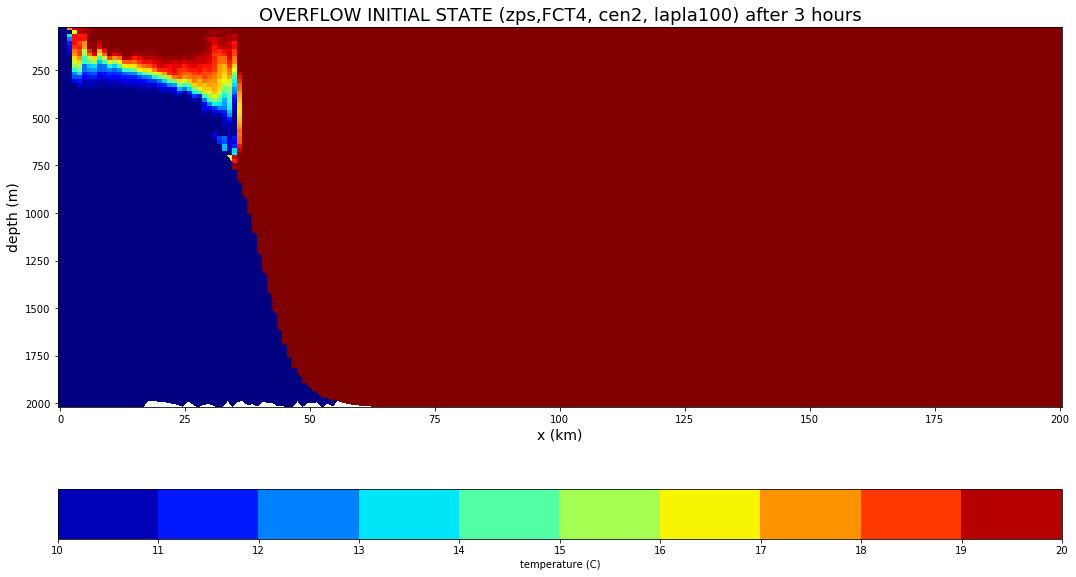

In [7]:
# plot figure of Temperature after 3 hours

fig = plt.figure(figsize=(18,10)) 
ax=plt.gca()  #get current axis
plt.pcolor(thetao_nav,thetao_depth,thetao_inst,vmin=10,vmax=20,cmap='jet')
plt.ylim(np.min(thetao_depth),np.max(thetao_depth))  
plt.xlim(np.min(thetao_nav),np.max(thetao_nav))  
ax.invert_yaxis() 

bounds=np.linspace(10,20,11)
cb=plt.colorbar(orientation='horizontal', spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
cb.set_label('temperature (C)')

plt.ylabel('depth (m)',fontsize=14)
plt.xlabel('x (km)',fontsize=14)
plt.title('OVERFLOW INITIAL STATE (zps,FCT4, cen2, lapla100) after 3 hours', fontsize='18')

ncfile.close()


In [8]:
# set time step after 9 hours, the end of simulation
time='18'
# read netcdf file
ncfile = Dataset('OVF_zps_FCT4_fluxcen2_lapahm100_avm0001_grid_T.nc', mode='r')

In [9]:
# read mesh_mask
ncmesh = Dataset('mesh_mask_OVF_zps.nc')
lat2d  = ncmesh.variables['gphit'][  :,:].squeeze()
lon2d  = ncmesh.variables['glamt'][  :,:].squeeze()
msk    = ncmesh.variables['tmask'][0,:,:].squeeze()
ncmesh.close()

In [10]:
# starting computation
thetao_nav=ncfile.variables['nav_lon'][1,:] 

thetao_inst=ncfile.variables['thetao_inst'][time,:,1,:]
thetao_e3t_inst=ncfile.variables['e3t_inst'][time,:,1,:]

thetao_depth=thetao_e3t_inst.squeeze()  
thetao_depth=np.cumsum(thetao_depth,0)  
thetao_nav=np.tile(thetao_nav,(np.size(thetao_depth,0),1))

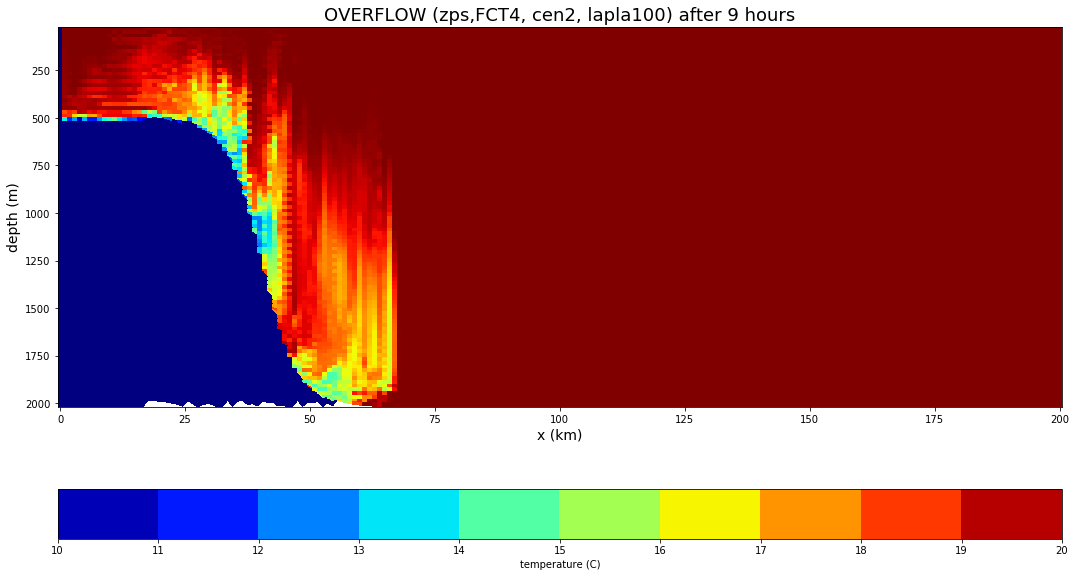

In [11]:
# plot figure of Temperature after 9 hours
fig = plt.figure(figsize=(18,10)) 
ax=plt.gca()  #get current axis
plt.pcolor(thetao_nav,thetao_depth,thetao_inst,vmin=10,vmax=20,cmap='jet')
plt.ylim(np.min(thetao_depth),np.max(thetao_depth))  
plt.xlim(np.min(thetao_nav),np.max(thetao_nav))  
ax.invert_yaxis() 

bounds=np.linspace(10,20,11)
cb=plt.colorbar(orientation='horizontal', spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
cb.set_label('temperature (C)')

plt.ylabel('depth (m)',fontsize=14)
plt.xlabel('x (km)',fontsize=14)
plt.title('OVERFLOW (zps,FCT4, cen2, lapla100) after 9 hours', fontsize='18')

ncfile.close()

some sensitivity experiments are available **[here](https://github.com/sflavoni/NEMO-test-cases/blob/master/overflow/notebook/Vertical-coordinates-Overflow-experiment.ipynb)**.